<a href="https://colab.research.google.com/github/ilham-mukti/Mencoba-Neural-Network/blob/main/CNN_Multiclass_File_Upload_HAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jcopdl
!unzip /content/data.zip

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

from tqdm.auto import tqdm
from jcopdl.callback import Callback, set_config
from jcopdl.layers import linear_block, conv_block

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
bs = 128
crop_size = 64

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
    ])

train_set = datasets.ImageFolder("/content/data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder("/content/data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

# **# Arsitektur dan Config**

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
          conv_block(3, 8),
          conv_block(8, 16),
          conv_block(16, 32),
          conv_block(32, 64),
          nn.Flatten()
      )
    self.fc = nn.Sequential(
          linear_block(1024, 256, dropout=0.2), #1024 dapet dari 64x4x4
          linear_block(256, 2, activation='lsoftmax')
      )
  def forward(self, x):
    x = self.conv(x)
    x = self.fc(x)
    return x

In [ ]:
config = set_config({
    'batch_size': bs,
    'crop_size': crop_size
})

# **Training Preparation -> MCOC**

In [ ]:
model = CNN().to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=6, plot_every=20, outdir='model')

In [ ]:
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
  if mode == 'train':
    model.train()
  elif mode == 'test':
    model.eval()
  
  cost = correct = 0
  for feature, target in tqdm(dataloader, desc=mode.title()):
    feature, target = feature.to(device), target.to(device)
    output = model(feature)
    loss = criterion(output, target)

    if mode == 'train':
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    
    cost += loss.item() * feature.shape[0]
    correct += (output.argmax(1) == target).sum().item()
  cost = cost/len(dataset)
  acc = correct/len(dataset)
  return cost, acc



Epoch     1
Train_cost  = 0.6901 | Test_cost  = 0.6826 | Train_score = 0.5240 | Test_score = 0.5150 |




Epoch     2
Train_cost  = 0.6820 | Test_cost  = 0.6771 | Train_score = 0.5370 | Test_score = 0.4950 |
==> EarlyStop patience =  1 | Best test_score: 0.5150




Epoch     3
Train_cost  = 0.6573 | Test_cost  = 0.6253 | Train_score = 0.5960 | Test_score = 0.6750 |




Epoch     4
Train_cost  = 0.6061 | Test_cost  = 0.5982 | Train_score = 0.6800 | Test_score = 0.6825 |




Epoch     5
Train_cost  = 0.5776 | Test_cost  = 0.5717 | Train_score = 0.7020 | Test_score = 0.6925 |




Epoch     6
Train_cost  = 0.5517 | Test_cost  = 0.5339 | Train_score = 0.7230 | Test_score = 0.7150 |




Epoch     7
Train_cost  = 0.4926 | Test_cost  = 0.4359 | Train_score = 0.7730 | Test_score = 0.8250 |




Epoch     8
Train_cost  = 0.4285 | Test_cost  = 0.4604 | Train_score = 0.8170 | Test_score = 0.7850 |
==> EarlyStop patience =  1 | Best test_score: 0.8250




Epoch     9
Train_cost  = 0.4332 | Test_cost  = 0.3753 | Train_score = 0.8050 | Test_score = 0.8450 |




Epoch    10
Train_cost  = 0.4208 | Test_cost  = 0.4188 | Train_score = 0.8010 | Test_score = 0.8275 |
==> EarlyStop patience =  1 | Best test_score: 0.8450




Epoch    11
Train_cost  = 0.4263 | Test_cost  = 0.3942 | Train_score = 0.8030 | Test_score = 0.8275 |
==> EarlyStop patience =  2 | Best test_score: 0.8450




Epoch    12
Train_cost  = 0.4167 | Test_cost  = 0.3928 | Train_score = 0.8120 | Test_score = 0.8350 |
==> EarlyStop patience =  3 | Best test_score: 0.8450




Epoch    13
Train_cost  = 0.4080 | Test_cost  = 0.3688 | Train_score = 0.8130 | Test_score = 0.8350 |
==> EarlyStop patience =  4 | Best test_score: 0.8450




Epoch    14
Train_cost  = 0.3915 | Test_cost  = 0.3579 | Train_score = 0.8320 | Test_score = 0.8425 |
==> EarlyStop patience =  5 | Best test_score: 0.8450




Epoch    15
Train_cost  = 0.3837 | Test_cost  = 0.3625 | Train_score = 0.8260 | Test_score = 0.8500 |




Epoch    16
Train_cost  = 0.3851 | Test_cost  = 0.3506 | Train_score = 0.8480 | Test_score = 0.8525 |




Epoch    17
Train_cost  = 0.3750 | Test_cost  = 0.3504 | Train_score = 0.8300 | Test_score = 0.8450 |
==> EarlyStop patience =  1 | Best test_score: 0.8525




Epoch    18
Train_cost  = 0.3744 | Test_cost  = 0.3531 | Train_score = 0.8330 | Test_score = 0.8400 |
==> EarlyStop patience =  2 | Best test_score: 0.8525




Epoch    19
Train_cost  = 0.3432 | Test_cost  = 0.3313 | Train_score = 0.8480 | Test_score = 0.8575 |




Epoch    20
Train_cost  = 0.3414 | Test_cost  = 0.3482 | Train_score = 0.8530 | Test_score = 0.8475 |


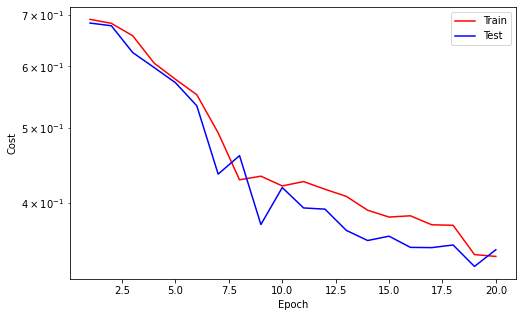

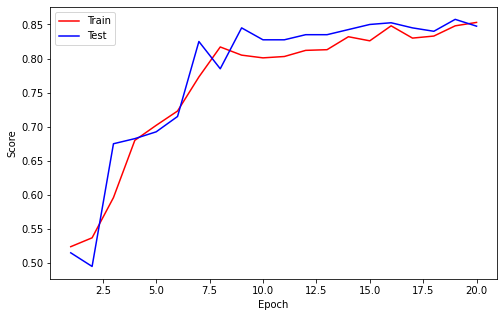

==> EarlyStop patience =  1 | Best test_score: 0.8575




Epoch    21
Train_cost  = 0.3400 | Test_cost  = 0.3487 | Train_score = 0.8530 | Test_score = 0.8400 |
==> EarlyStop patience =  2 | Best test_score: 0.8575




Epoch    22
Train_cost  = 0.3383 | Test_cost  = 0.3638 | Train_score = 0.8600 | Test_score = 0.8325 |
==> EarlyStop patience =  3 | Best test_score: 0.8575




Epoch    23
Train_cost  = 0.3462 | Test_cost  = 0.3226 | Train_score = 0.8460 | Test_score = 0.8700 |




Epoch    24
Train_cost  = 0.3274 | Test_cost  = 0.3292 | Train_score = 0.8600 | Test_score = 0.8525 |
==> EarlyStop patience =  1 | Best test_score: 0.8700




Epoch    25
Train_cost  = 0.3342 | Test_cost  = 0.3371 | Train_score = 0.8670 | Test_score = 0.8600 |
==> EarlyStop patience =  2 | Best test_score: 0.8700




Epoch    26
Train_cost  = 0.3306 | Test_cost  = 0.3032 | Train_score = 0.8630 | Test_score = 0.8775 |




Epoch    27
Train_cost  = 0.3163 | Test_cost  = 0.3132 | Train_score = 0.8680 | Test_score = 0.8675 |
==> EarlyStop patience =  1 | Best test_score: 0.8775




Epoch    28
Train_cost  = 0.3140 | Test_cost  = 0.3042 | Train_score = 0.8720 | Test_score = 0.8750 |
==> EarlyStop patience =  2 | Best test_score: 0.8775




Epoch    29
Train_cost  = 0.3205 | Test_cost  = 0.2866 | Train_score = 0.8640 | Test_score = 0.8775 |
==> EarlyStop patience =  3 | Best test_score: 0.8775




Epoch    30
Train_cost  = 0.3201 | Test_cost  = 0.3231 | Train_score = 0.8640 | Test_score = 0.8775 |
==> EarlyStop patience =  4 | Best test_score: 0.8775




Epoch    31
Train_cost  = 0.3272 | Test_cost  = 0.2826 | Train_score = 0.8610 | Test_score = 0.8875 |




Epoch    32
Train_cost  = 0.3097 | Test_cost  = 0.3018 | Train_score = 0.8780 | Test_score = 0.8725 |
==> EarlyStop patience =  1 | Best test_score: 0.8875




Epoch    33
Train_cost  = 0.2924 | Test_cost  = 0.2813 | Train_score = 0.8810 | Test_score = 0.8825 |
==> EarlyStop patience =  2 | Best test_score: 0.8875




Epoch    34
Train_cost  = 0.2828 | Test_cost  = 0.3224 | Train_score = 0.8850 | Test_score = 0.8725 |
==> EarlyStop patience =  3 | Best test_score: 0.8875




Epoch    35
Train_cost  = 0.2922 | Test_cost  = 0.2974 | Train_score = 0.8770 | Test_score = 0.8700 |
==> EarlyStop patience =  4 | Best test_score: 0.8875




Epoch    36
Train_cost  = 0.2888 | Test_cost  = 0.2907 | Train_score = 0.8740 | Test_score = 0.8800 |
==> EarlyStop patience =  5 | Best test_score: 0.8875




Epoch    37
Train_cost  = 0.2917 | Test_cost  = 0.3379 | Train_score = 0.8760 | Test_score = 0.8400 |
==> EarlyStop patience =  6 | Best test_score: 0.8875
==> Execute Early Stopping at epoch: 37 | Best test_score: 0.8875
==> Best model is saved at model


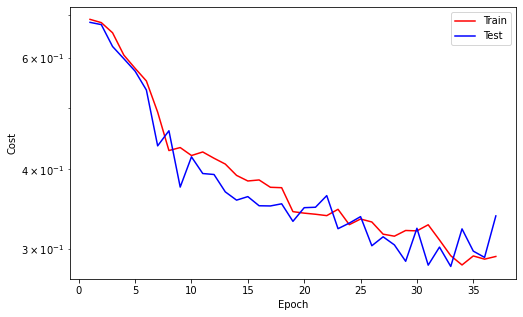

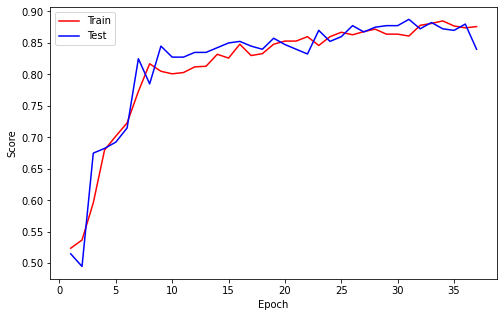

In [ ]:
while True:
  train_cost, train_score = loop_fn('train', train_set, trainloader, model, criterion, optimizer, device)
  with torch.no_grad():
    test_cost, test_score = loop_fn('test', test_set, testloader, model, criterion, optimizer, device)

  # Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  # Checkpoint
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor='test_score'):
    callback.plot_cost()
    callback.plot_score()
    break

In [ ]:
weights = torch.load('/content/model/weights_best.pth', map_location="cpu")
config = torch.load('/content/model/configs.pth', map_location='cpu')

model = CNN()
model.load_state_dict(weights)
model = model.to(device)

In [ ]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)
label2cat = train_set.classes

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)
preds
#[label2cat[pred] for pred in preds]

tensor([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 1], device='cuda:0')

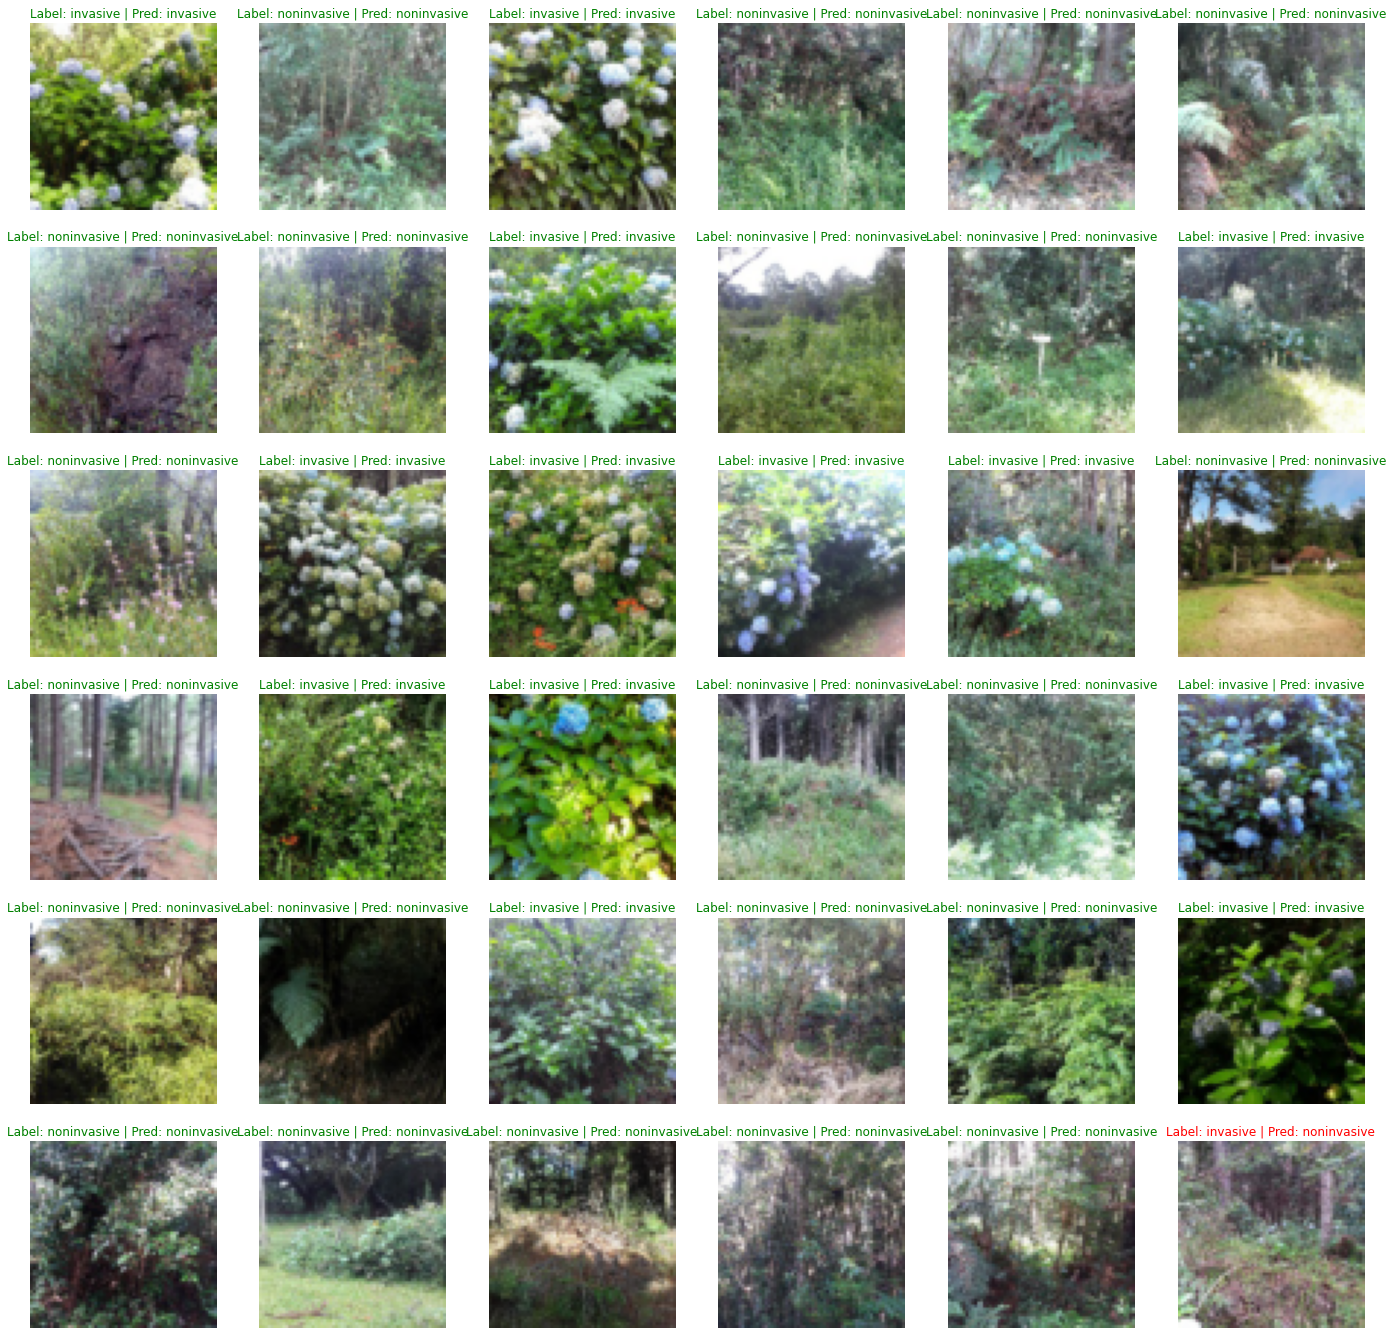

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
  ax.imshow(img.permute(1,2,0).cpu())
  font = {"color":'r'} if label != pred else {"color": 'g'}
  label, pred = label2cat[label.item()], label2cat[pred.item()]
  ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font);
  ax.axis("off");

True